In [359]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

import hw5_version
import hw5bias_version_g2
import surprise_version
importlib.reload(hw5_version)
importlib.reload(hw5bias_version_g2)
importlib.reload(surprise_version)

%config InlineBackend.figure_format = 'retina'


In [329]:
def visualize_V(U, V, labels=None, index=None, name='temp', save=True, title=None, hue=None,size=None):
    A, s, B = np.linalg.svd(V.T)
    U_proj = A[:,0:2].T@U.T
    V_proj = A[:,0:2].T@V.T
    plt.figure(figsize=(8,4))
    
    
    if index is None:
        plot = sns.scatterplot(V_proj[0,:],V_proj[1,:],hue=hue,size=size,legend=False)
    else : 
        plot = sns.scatterplot(V_proj[0,index-1],V_proj[1,index-1],hue=hue[index],size=size[index],legend=False)
        
#     plot._legend.remove()
        
    limits = plt.ylim()
    offset = (limits[1]-limits[0])*0.02
    if not (labels is None):
        for i, label in enumerate(labels):
            txt = plot.text(V_proj[0,index[i]-1],V_proj[1,index[i]-1]+offset, label, horizontalalignment='center')
            relative_location = (V_proj[0,index[i]-1]-plt.xlim()[0])/(plt.xlim()[1] - plt.xlim()[0]) 
            if relative_location < 0.2:
                txt.set(horizontalalignment='left')
            elif relative_location > 0.8:
                txt.set(horizontalalignment='right')
            
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    if save:
        fig = plot.get_figure()
        fig.savefig(f'{name}.png')
        fig.savefig(f'{name}.pdf')
    

In [274]:
def multi_vis(U, V, name='temp',save=True,hue=None,size=None):
    df = pd.read_csv('./data/movies3.txt',sep='\t',header=None)
    movies = df[1]
    
    # Ten Movies of our choice
    choice = np.arange(1,11)
    visualize_V(U,V,index=choice,name=f'{name}_choice',labels=movies[choice-1],save=save,title=f'Arbitrarily Chosen Movies with {name}',hue=hue,size=size)
    
    # Ten Most Popular
    popular = np.array([50, 258, 100, 181, 294, 286, 288, 1, 300, 121])
    visualize_V(U,V,index=popular,name=f'{name}_popular',labels=movies[popular-1],save=save,title=f'Most Popular Movies with {name}',hue=hue,size=size)
    
    # Ten Best
    best = np.array([1189, 1500, 814, 1536, 1293, 1599, 1653, 1467, 1122, 1201])
    visualize_V(U,V,index=best,name=f'{name}_best',labels=movies[best-1],save=save,title=f'\'Best\' Movies with {name}',hue=hue,size=size)
    
    # Ten from each of three genres
    animation = np.array([1, 71, 95, 99, 101, 102, 103, 114, 169, 189])
    documentaries = np.array([32, 48, 75, 115, 119, 320, 360, 634, 644, 645])
    sci_fi = np.array([7, 38, 39, 50, 62, 82, 84, 89, 96, 101])
    # Genre 1
    visualize_V(U,V,index=animation,name=f'{name}_animation',labels=movies[animation-1],save=save,title=f'Animation Movies with {name}',hue=hue,size=size)
    # Genre 2
    visualize_V(U,V,index=documentaries,name=f'{name}_documentary',labels=movies[documentaries-1],save=save,title=f'Documentary Movies with {name}',hue=hue,size=size)
    # Genre 3
    visualize_V(U,V,index=sci_fi,name=f'{name}_scifi',labels=movies[sci_fi-1],save=save,title=f'SciFi Movies with {name}',hue=hue,size=size)

In [221]:
Y_train = np.loadtxt('./data/train3.txt').astype(int)
Y_test = np.loadtxt('./data/test3.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


K = 20
eta = 0.03
reg = 0
reg = 0.1


# Using the Homework 5 version of SVD 

In [222]:
U,V, e_in_base = hw5_version.train_model(M, N, K, eta, reg, Y_train)

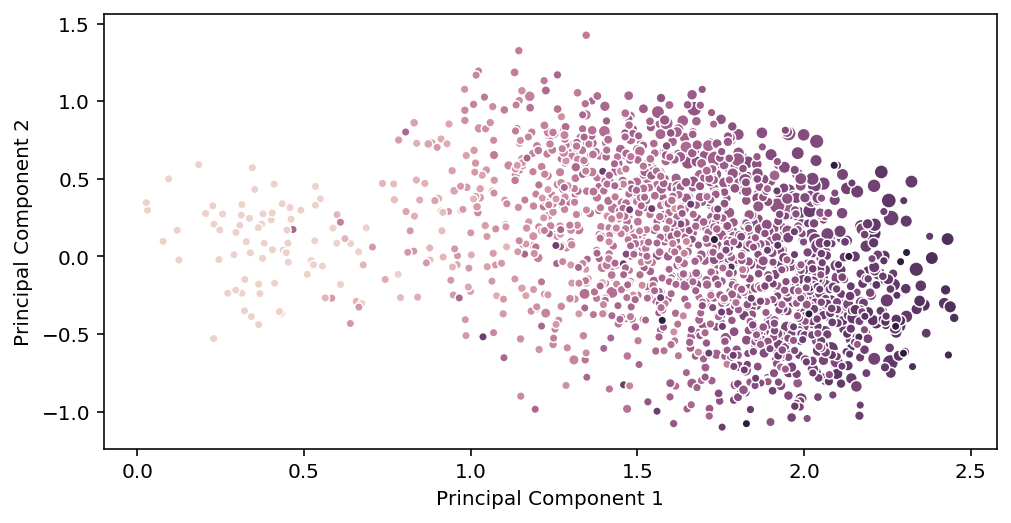

In [281]:
visualize_V(U,V, hue=hue,size=size)

In [224]:
print(e_in_base)
e_out_base = hw5_version.get_err(U,V,Y_test)
print(hw5_version.get_err(U,V,Y_test))

0.2799761554891516
0.4472635926801705


# Using the implementation with the additional bias terms

In [310]:
U_bias, V_bias, a_bias, b_bias, mu_bias, e_in_bias = hw5bias_version_g2.train_model(M, N, K, eta, reg, Y_train)

0
168.33160114435083


KeyboardInterrupt: 

In [234]:
print(e_in_bias)
e_out_bias = hw5bias_version_g2.get_err(U_bias,V_bias, Y_test, a_bias, b_bias, mu_bias)
print(e_out_bias)

0.36877543313890315
0.44098687412650334


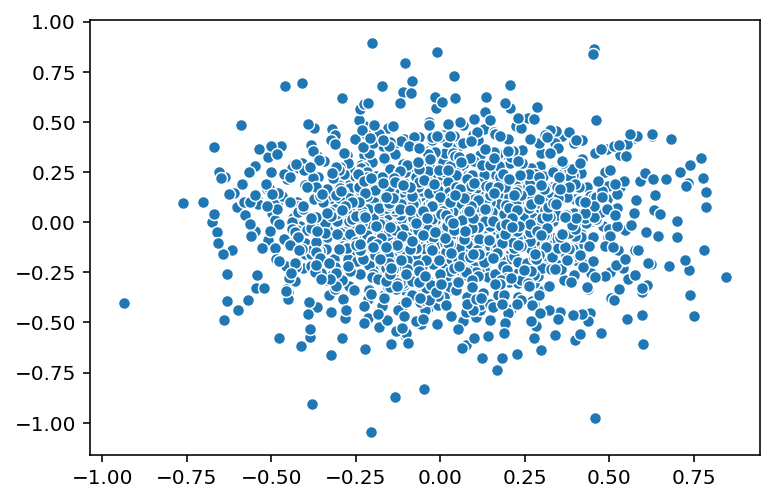

In [235]:
visualize_V(U_bias,V_bias)

# Using the off the shelf implementation of SVD.

In [357]:
model,  e_in_sur, trainset = surprise_version.train_model(M, N, K, eta, reg, Y_train)

          1
89407     1
41860     1
41898     1
18687     1
89316     1
71703     1
28907     1
28905     1
77271     1
89335     1
87182     1
18788     1
81462     1
81464     1
71751     1
58609     1
18933     1
5145      1
58564     1
1719      1
42279     1
58304     1
42371     1
58152     1
42479     1
58121     1
28595     1
42596     1
19402     1
57794     1
...     ...
44914  1657
48001  1658
68958  1658
48781  1658
85180  1659
46678  1660
47645  1661
62342  1662
49654  1662
54068  1663
53474  1664
78255  1664
86539  1664
69288  1664
79929  1665
73013  1668
52900  1669
81177  1670
75353  1671
61646  1672
59633  1672
59680  1673
86788  1674
83720  1675
72025  1676
60485  1677
60528  1679
72313  1680
83074  1681
85817  1682

[90000 rows x 1 columns]
1    1682
dtype: int32
1    1
dtype: int32
(array([], dtype=int64),)
1668
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,

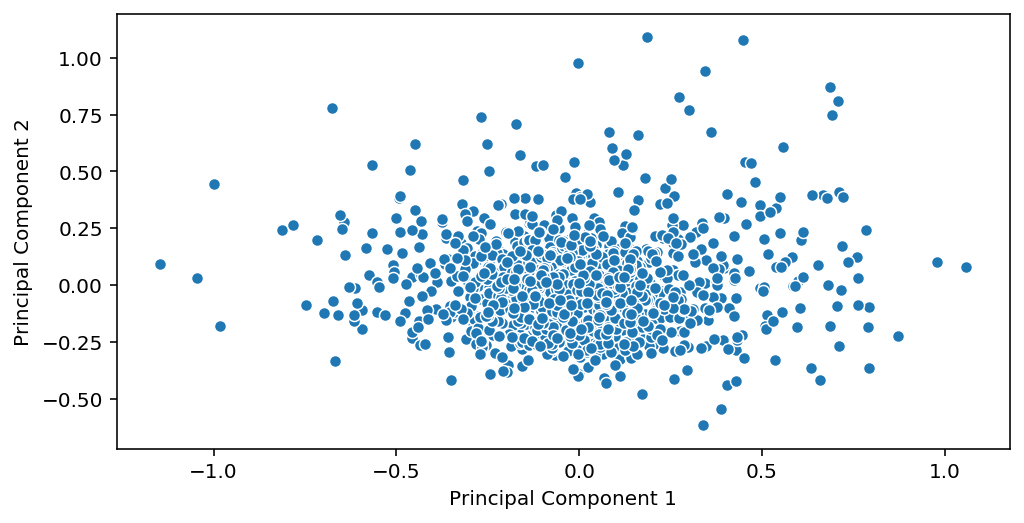

In [358]:
visualize_V(model.pu,model.qi)

In [350]:
print(e_in_sur)
e_out_sur = surprise_version.get_err(model,Y_test)
print(surprise_version.get_err(model,Y_test))

0.2302770695932444
[3.05657296 3.59693739 4.7103306  ... 3.8544871  2.89243839 2.58097423]
[3.05657296 3.59693739 4.7103306  ... 3.8544871  2.89243839 2.58097423]
0.4301817881861586


# Create the visualizations

C:\Users\George\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\George\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


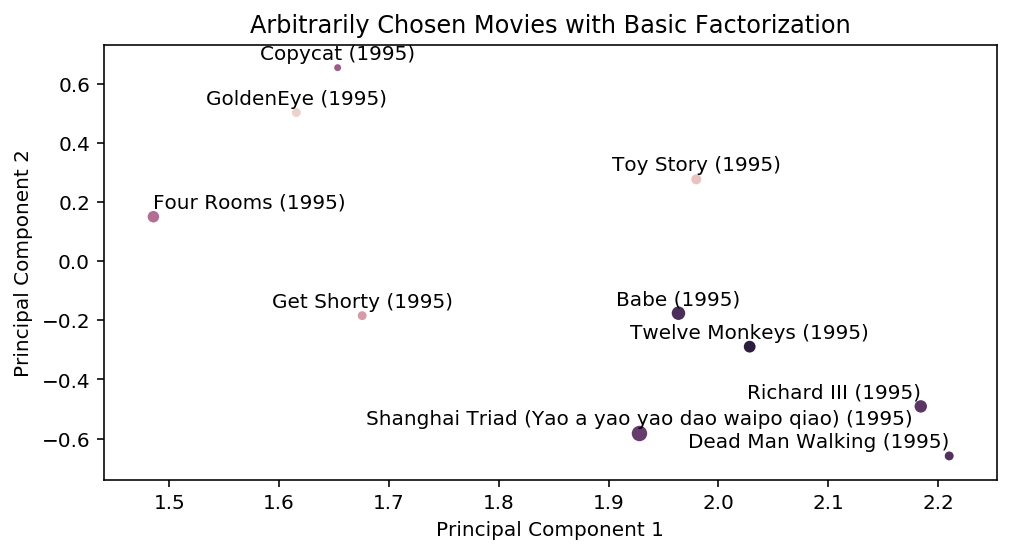

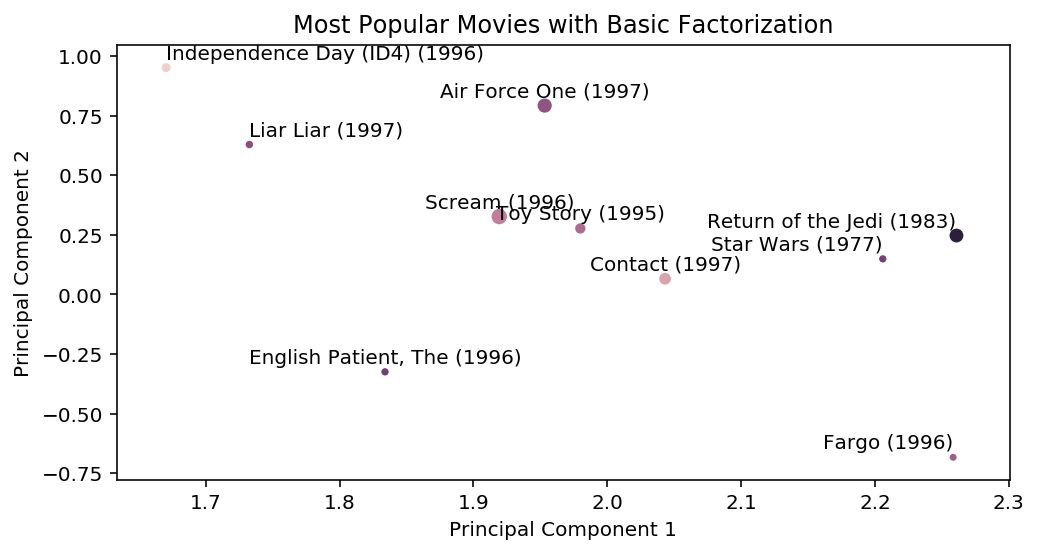

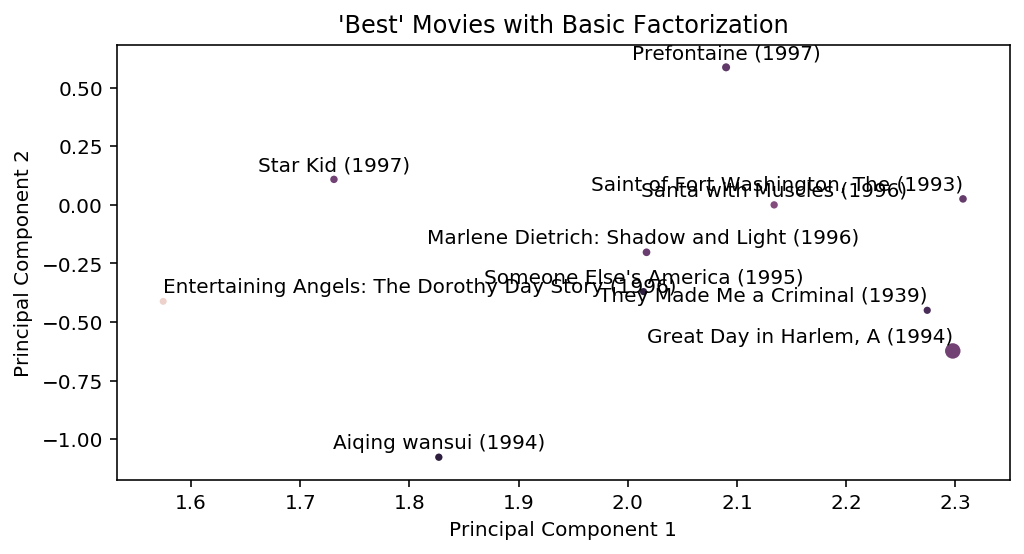

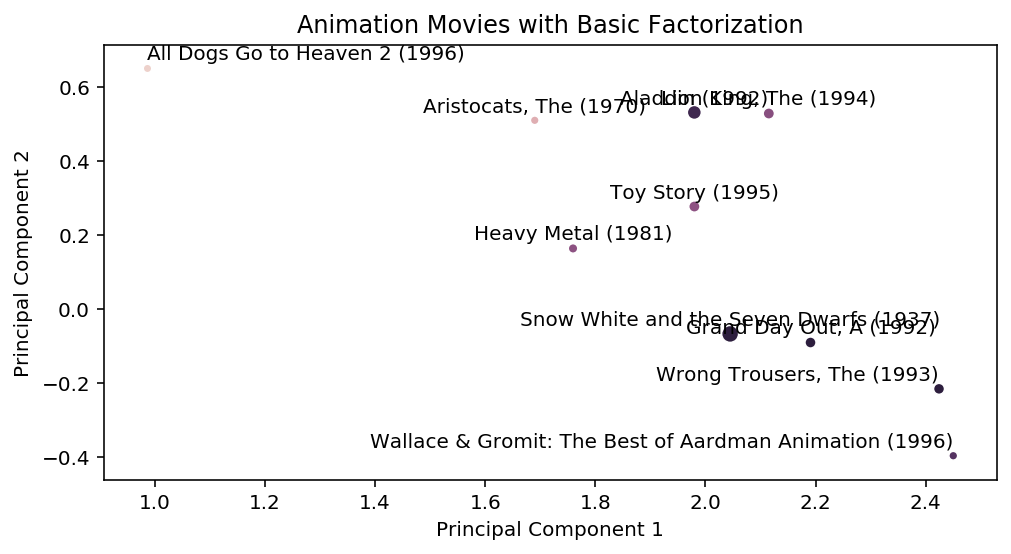

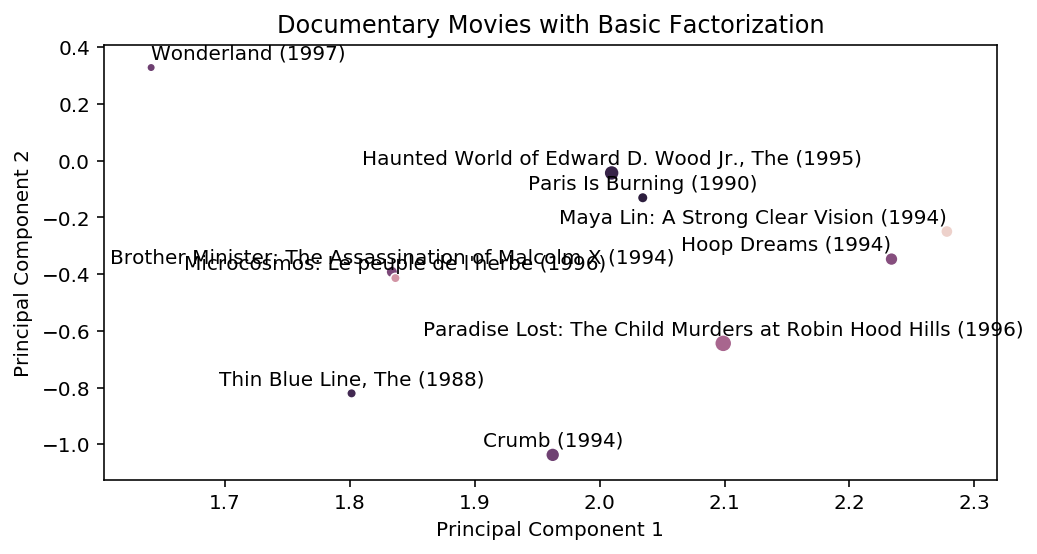

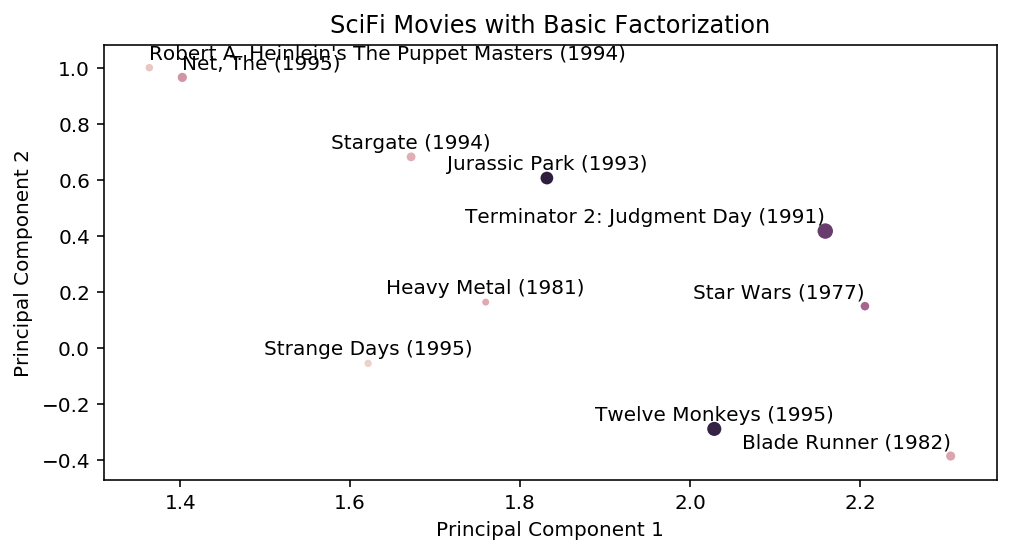

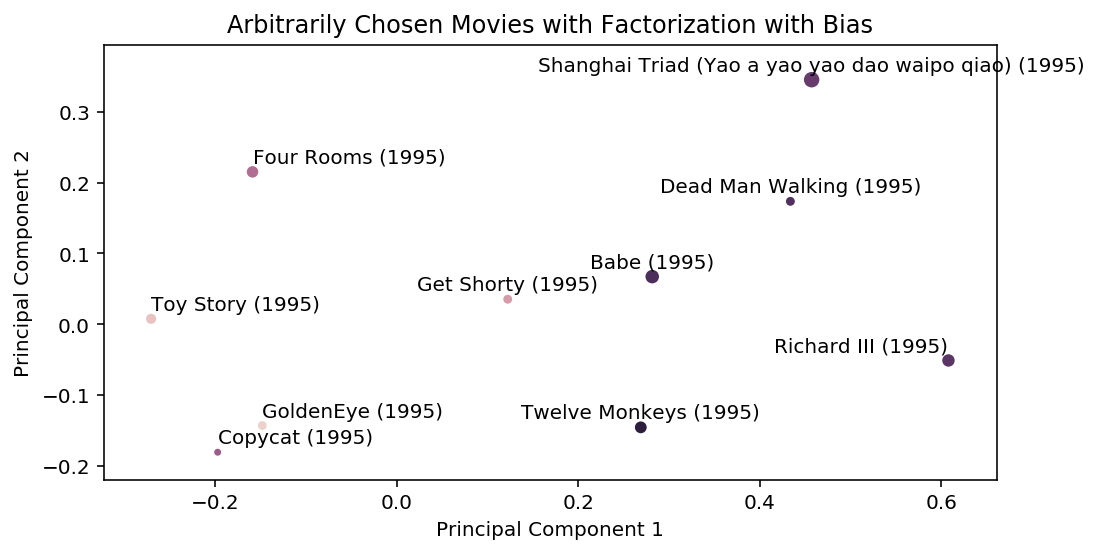

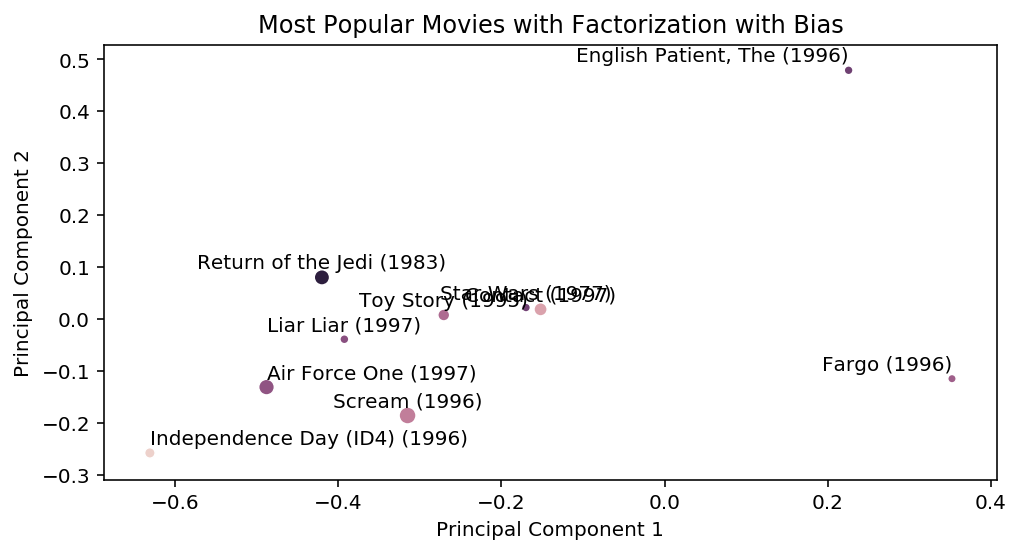

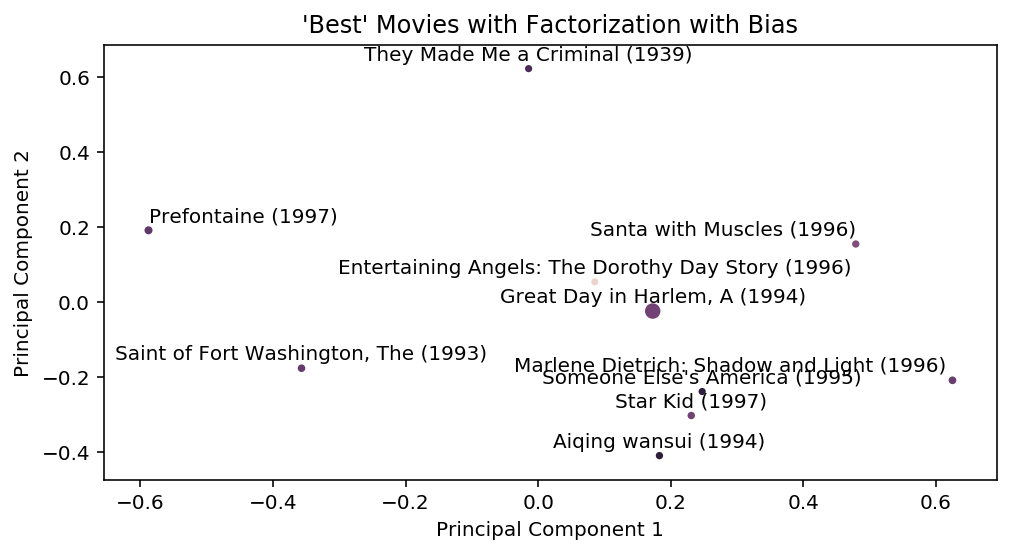

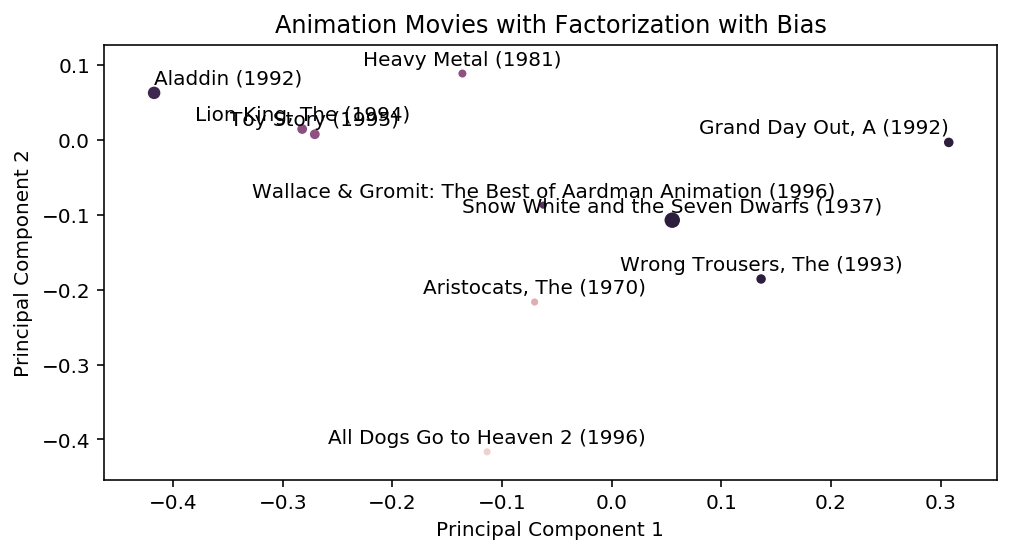

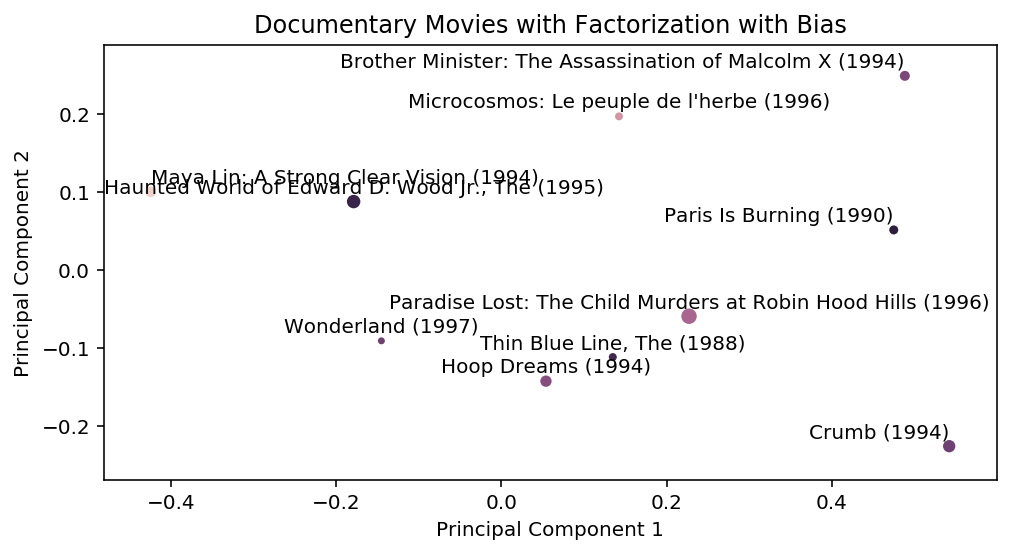

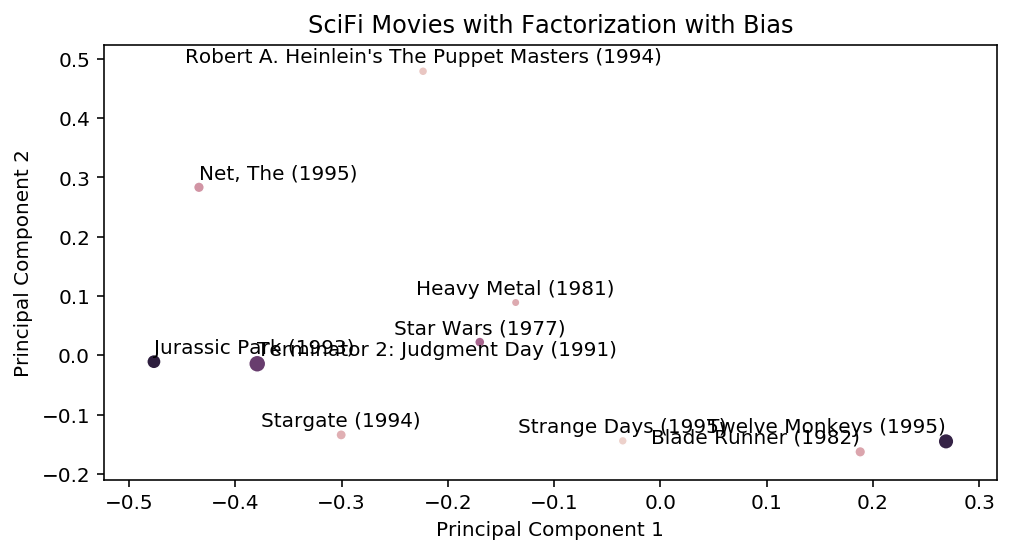

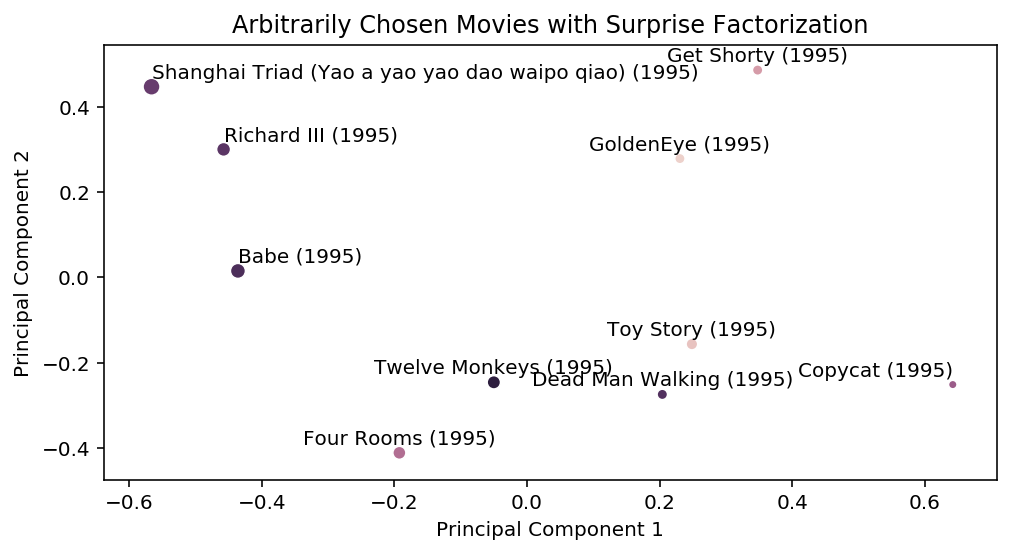

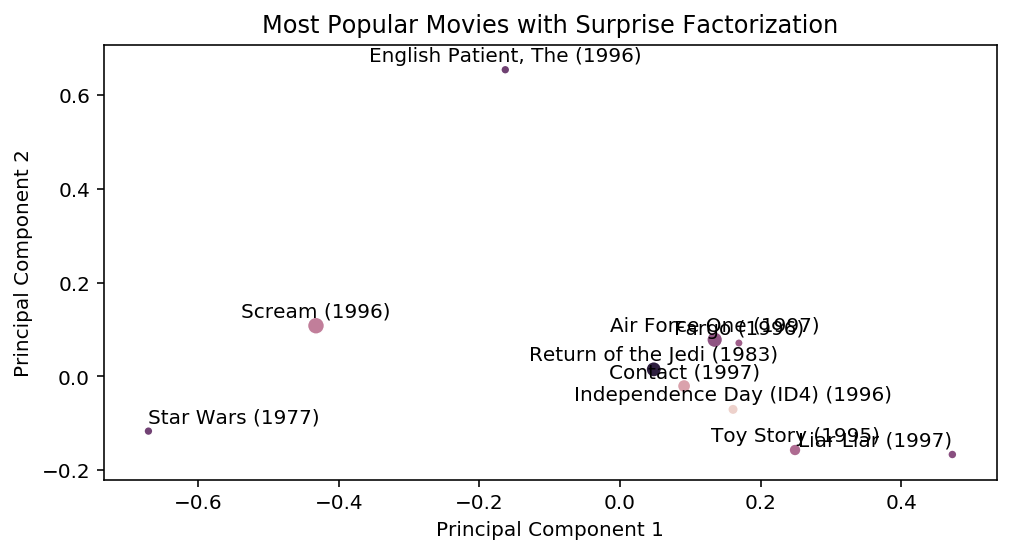

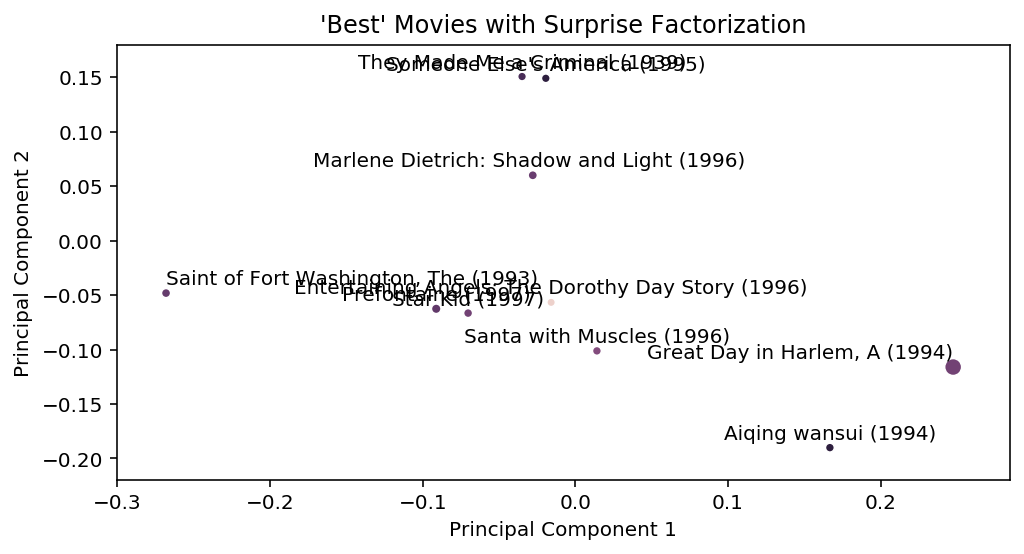

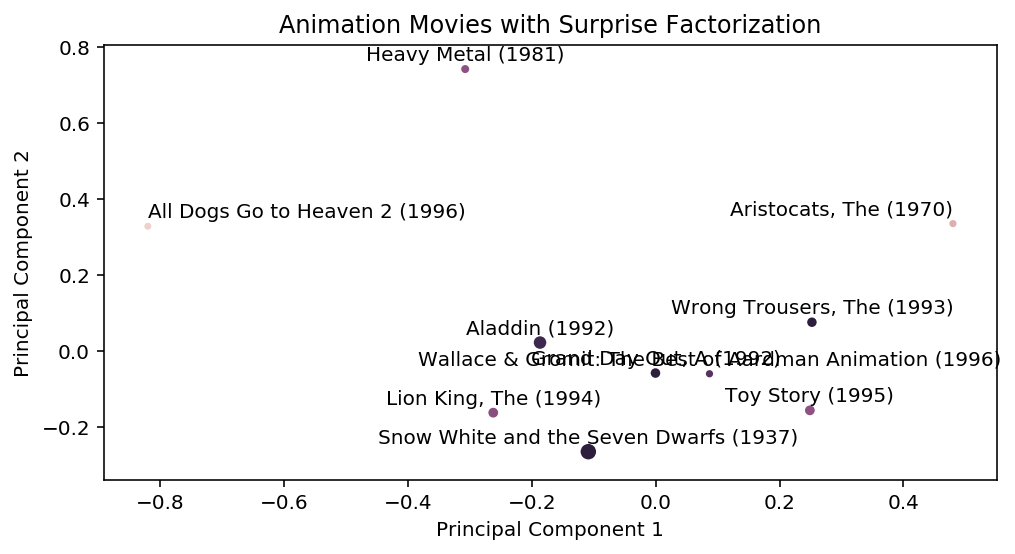

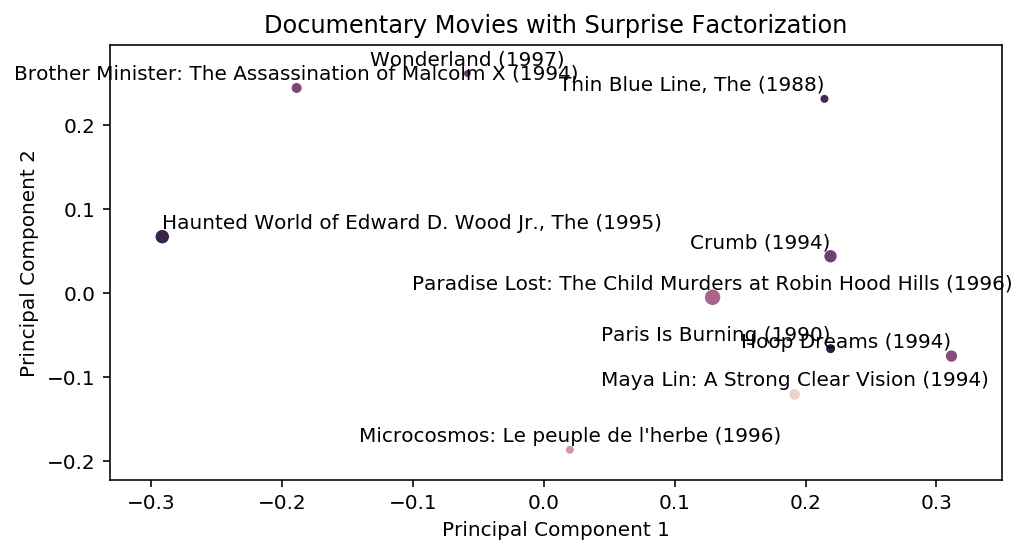

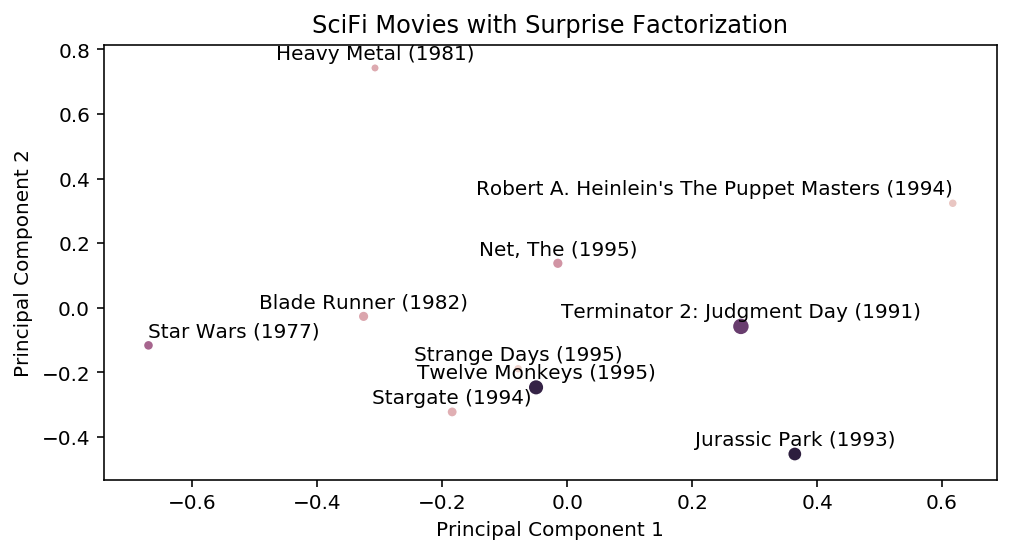

In [315]:
hue = np.asarray(list(map(lambda movie_id : np.mean(Y_train[Y_train[:,1]==movie_id,2]), np.arange(N)+1)))
size = np.asarray(list(map(lambda movie_id : np.sum(Y_train[:,1]==movie_id), np.arange(N)+1)))
multi_vis(U,V,name='Basic Factorization',hue=hue,size=size)
multi_vis(U_bias,V_bias,name='Factorization with Bias',hue=hue,size=size)
multi_vis(model.pu,model.qi,name='Surprise Factorization',hue=hue[],size=size[])

# Visualize all movies for each method

KeyboardInterrupt: 

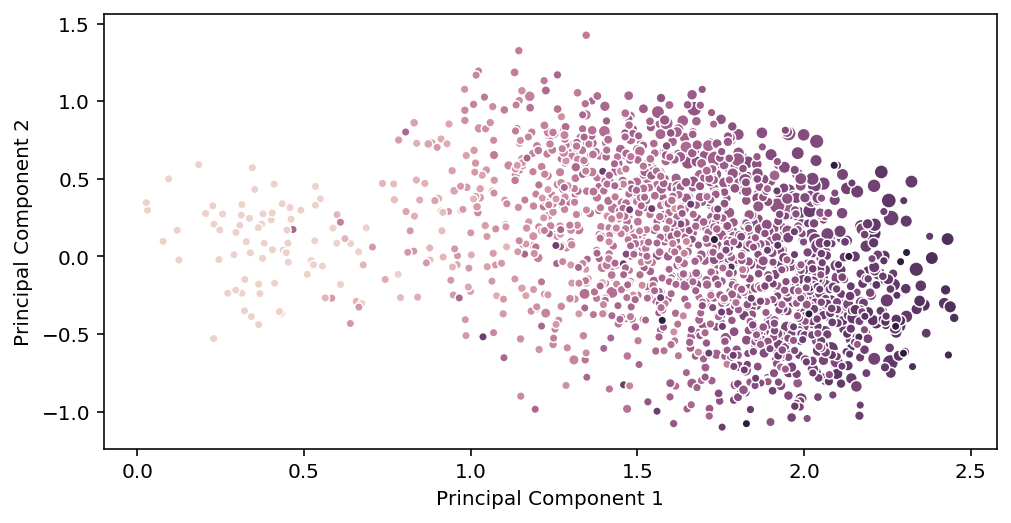

In [316]:
visualize_V(U,V,name='Basic Factorization',hue=hue,size=size)
visualize_V(U_bias,V_bias,name='Factorization with Bias',hue=hue,size=size)
print(model.qi.shape)
print(hue.shape)
visualize_V(model.pu,model.qi,name='Surprise Factorization',hue=hue,size=size)

# Plot the performance

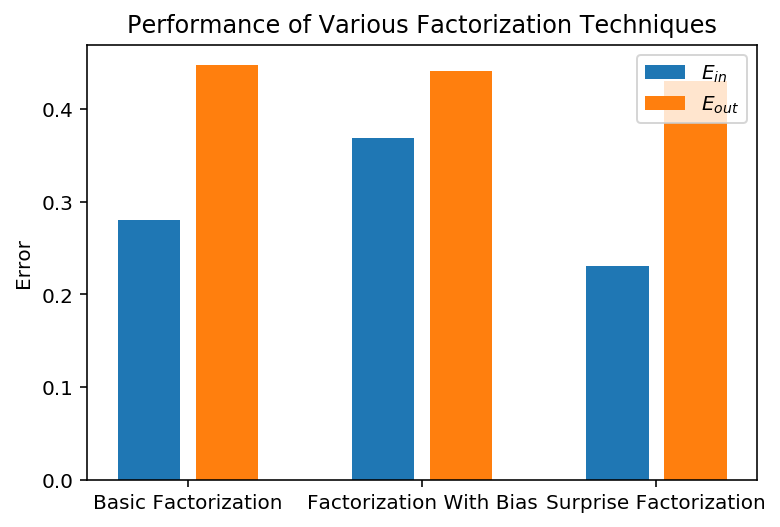

In [351]:

temp = np.array([[e_in_base,e_out_base],[e_in_bias,e_out_bias],[e_in_sur,e_out_sur]])
for i in range(2):
    plt.bar(x=np.arange(0,3)*3+i-0.5,height=temp[:,i])
    plt.legend(['$E_{in}$','$E_{out}$'])
    plt.title('Performance of Various Factorization Techniques')
    plt.ylabel('Error')
    plt.xticks(np.arange(0,3)*3, ['Basic Factorization', 'Factorization With Bias', 'Surprise Factorization'])
    
name = 'performace'
plt.savefig(f'{name}.png')
plt.savefig(f'{name}.pdf')